In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, bernoulli
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set()

# LDA & QDA

## 1

In [79]:
from matplotlib import cm

def plotXY(X, Y):
    """
        Scatter points from two classes.
        Input:
            X and Y may be:
            - two numpy arrays with two columns; each array is the data matrix for a class (works only for
            two classes).
            - a numpy array with two columns (the data matrix) and the vector of labels (works for many classes).
    """    
    if Y.ndim > 1:
        X1 = X
        X2 = Y
        XX = np.concatenate((X, Y), axis=0)
        YY = np.concatenate((np.ones(X.shape[0]), -np.ones(Y.shape[0])))
    else:
        XX = X
        YY = Y
    for icl, cl in enumerate(np.unique(YY)):
        plt.scatter(XX[YY==cl, 0], XX[YY==cl, 1], label='Class {0:d}'.format(icl+1))
    plt.axis('equal')
    plt.legend()
    
def plot_frontiere(clf, data=None, num=500, label=None):
    """
        Plot the frontiere f(x)=0 of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: binary classifier with a method decision_function
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = np.fabs(clf.decision_function(np.c_[x.ravel(), y.ravel()])).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    ind = np.where((z-zmin)/(zmax-zmin) < 0.001)
    ind_sort = np.argsort(y[ind])
    plt.plot(x[ind][ind_sort], y[ind][ind_sort], label=label, linewidth=2)
    
def map_regions(clf, data=None, num=200):
    """
        Map the regions f(x)=1…K of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: classifier with a method predict
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = clf.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    plt.imshow(z, origin='lower', interpolation="nearest",
               extent=[xmin, xmax, ymin, ymax], cmap=cm.coolwarm,
              alpha=0.3)

In [123]:
def simulation(mean, cov, size=300):
    X1= multivariate_normal.rvs(mean=mean[0], cov=cov, size=100)
    X2= multivariate_normal.rvs(mean=mean[1], cov=cov, size=100)
    X3= multivariate_normal.rvs(mean=mean[2], cov=cov, size=100)
    arr = np.r_[X1,X2,X3]
    Y = np.concatenate([np.repeat(1,100), np.repeat(2,100), np.repeat(3,100)])
    df = np.column_stack([arr, Y])
    return arr,Y


In [124]:
arr, Y = simulation(mean = ([0,0], [5,5], [3,3]), cov=[1,1], size=300)
X_train, X_test, y_train, y_test = train_test_split(arr, Y, train_size=0.7)
#LDA
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

#mean's estimations
lda_clf.means_

array([[-3.54671693e-01,  3.08144475e-03],
       [ 4.91537336e+00,  4.88512600e+00],
       [ 2.91879434e+00,  2.84283619e+00]])

In [115]:
#priors estimations
lda_clf.priors_

array([0.31904762, 0.31428571, 0.36666667])

In [103]:
#QDA
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

#mean's estimations
qda_clf.means_

array([[0.01708532, 0.04345684],
       [5.04475138, 4.91996078],
       [3.10301645, 3.0835701 ]])

In [104]:
#priors estimations
qda_clf.priors_

array([0.31904762, 0.31428571, 0.36666667])

In [105]:
lda_pred = lda_clf.predict(X_test)
qda_pred = qda_clf.predict(X_test)
df_lda = pd.DataFrame({'X1':X_test[:,0], 'X2':X_test[:,1], 'y_pred':lda_pred})
df_qda = pd.DataFrame({'X1':X_test[:,0], 'X2':X_test[:,1], 'y_pred':qda_pred})


Text(0.5, 1, 'lDA')

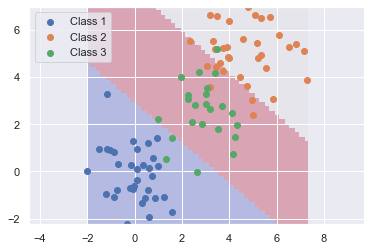

In [106]:
#LDA
plotXY(X_test, y_test)
map_regions(lda_clf, data=X_test)
ax.set_title('lDA')

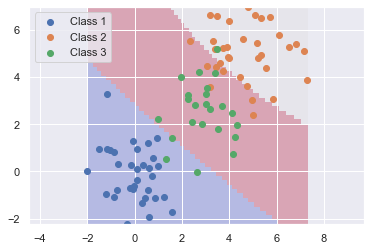

In [107]:
#QDA
plotXY(X_test, y_test)
map_regions(qda_clf, data=X_test)

In [94]:
#confusion matrix LDA
confusion_matrix(y_test, lda_pred)

array([[31,  0,  1],
       [ 0, 28,  4],
       [ 1,  2, 23]])

In [95]:
#confusion matrix QDA
confusion_matrix(y_test, qda_pred)

array([[31,  0,  1],
       [ 0, 29,  3],
       [ 1,  3, 22]])

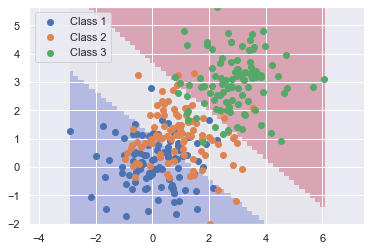

In [131]:
arr, Y = simulation(mean = ([0,0], [1,1], [3,3]), cov=[1,1], size=300)
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(arr, Y)
qda_clf.predict(arr)

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(arr, Y)
lda_clf.predict(arr)

#LDA
plotXY(arr, Y)
map_regions(lda_clf, arr)

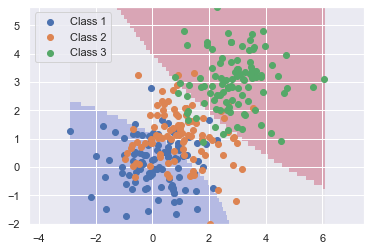

In [132]:
#QDA
lda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(arr, Y)
qda_clf.predict(arr)
plotXY(arr, Y)
map_regions(qda_clf, arr)

Si le problème est séparable linéairement (+simple) on va priviligier LDA car + simple que QDA et - de paramètres à estimer. En revanche si le problème est plus complexe, on va prviliégier QDA.


## 2

In [217]:
df = pd.read_csv('iris.csv', index_col=0, dtype={'Species':'category'})
df['Species_int'] = df['Species'].cat.codes
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_int
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [218]:
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,:2], df['Species_int'], train_size=0.6)

In [219]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_pred = lda_clf.predict(X_test)

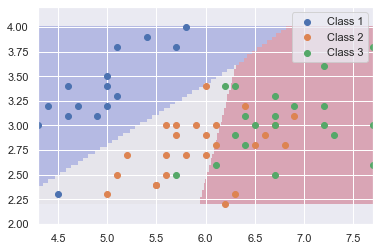

In [220]:
plotXY(np.array(X_test) ,np.array(y_test))
map_regions(lda_clf, np.array(X_test))

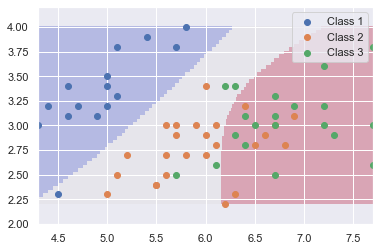

In [225]:
qla_clf = QuadraticDiscriminantAnalysis()
qla_clf.fit(X_train, y_train)
qla_pred = qla_clf.predict(X_test)
plotXY(np.array(X_test), np.array(y_test))
map_regions(qla_clf, np.array(X_test))

## 3

/ (TO DO)

## 4

In [233]:
df = pd.read_csv('cercles3.txt', sep = ' ')
df.head()

,V1,V2
1,-0.740640,-0.932144
2,-1.146606,-0.062847
3,-0.406936,1.125740
4,-0.908359,0.094061
5,-0.378027,-0.815752


''

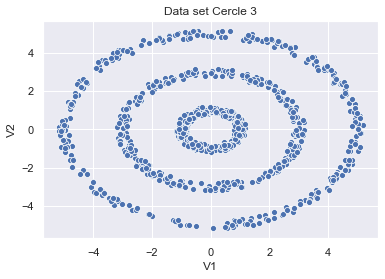

In [240]:
fig , ax = plt.subplots()
sns.scatterplot(df['V1'], df['V2'])
ax.set_title('Data set Cercle 3')
;

In [282]:
from scipy.spatial import distance
from numpy.linalg import norm

def affecter_label(x):
    o = (0,0)
    r = np.sqrt(x[0]**2+x[1]**2)
    if r < 2:
        y = 1
    elif 2 < r and r < 4:
        y= 2
    else:
        y=3
    return y

df['y'] = df.apply(lambda row : affecter_label(row), axis=1)

''

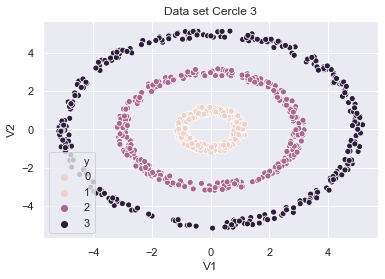

In [283]:
fig , ax = plt.subplots()
sns.scatterplot('V1', 'V2', hue='y', data=df)
ax.set_title('Data set Cercle 3')
;

''

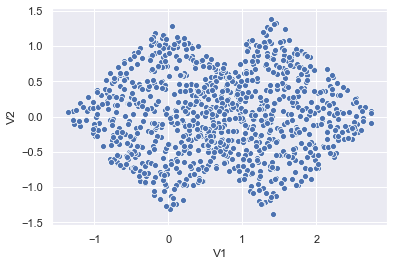

In [260]:
df2 = pd.read_csv('noeud.txt', sep=' ')
sns.scatterplot(df2['V1'], df2['V2'])
ax.set_title('Data set Noeud')
;